In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from numpy.random import multivariate_normal
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.datasets import make_circles

Error : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best K: 1
Test accuracy:  1.0
Test Dataset Shape: (250, 2)


(-2.3155350309092637, 2.2444649690907403)

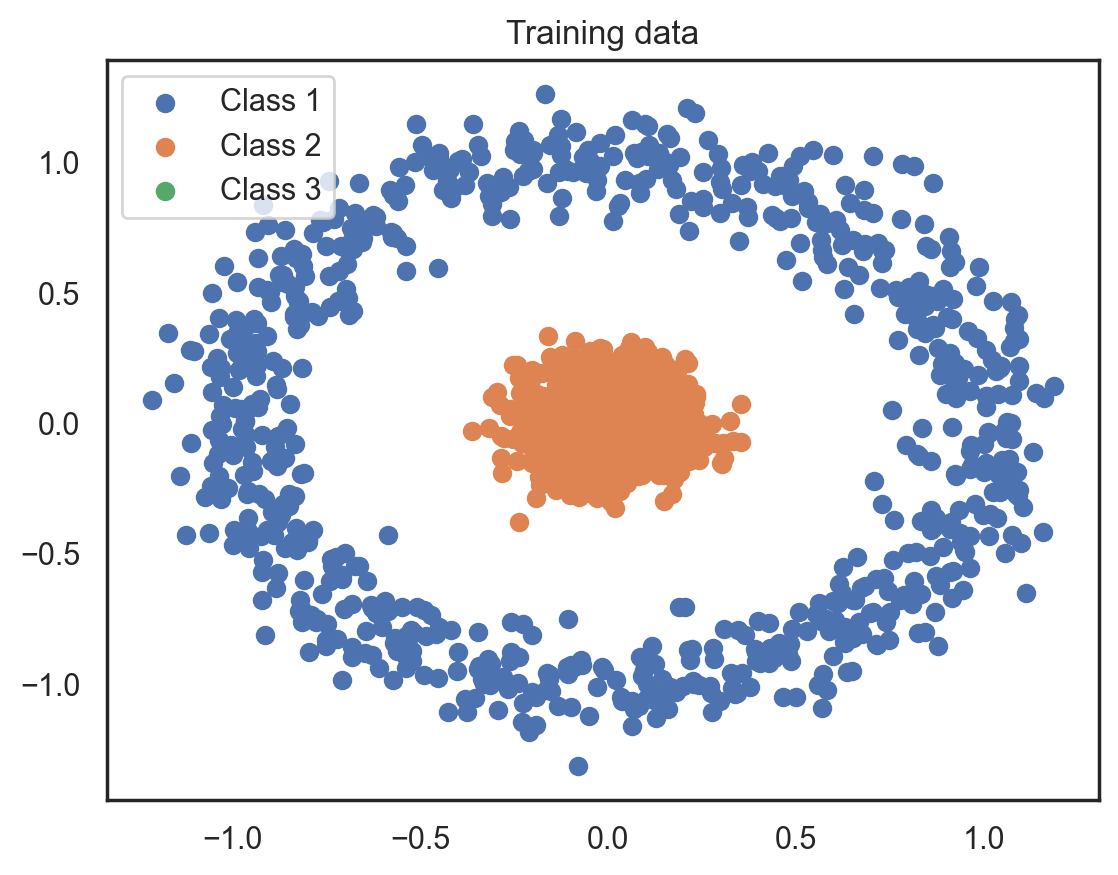

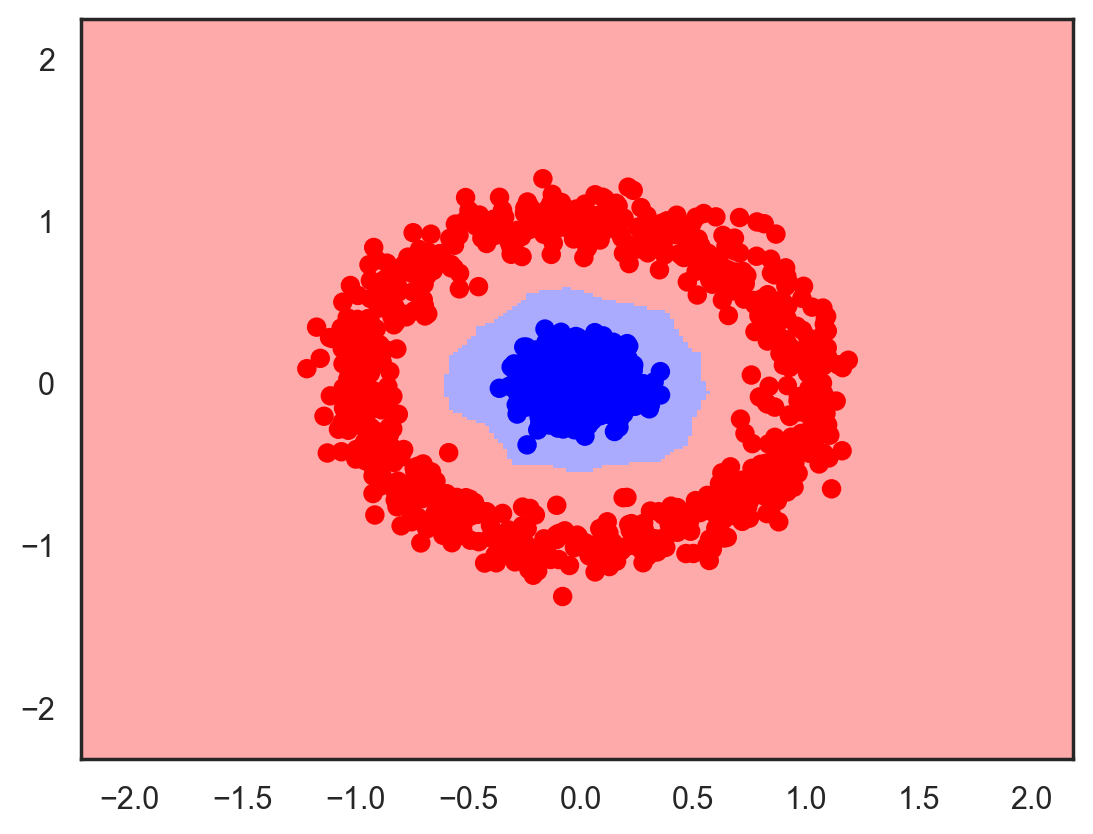

In [156]:
c=0.01
lr=0.1
batchsize=5
epoch=10
device="mps"
h = .02  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
device = torch.device(device if torch.cuda.is_available() else "cpu")
X , Y = make_circles(1500, factor=0.1, noise=0.1)
X, Y = shuffle(X,Y,random_state=1)
fig, ax = plt.subplots()
ax.scatter(X[np.where(Y==0),0], X[np.where(Y==0),1], label='Class 1')
ax.scatter(X[np.where(Y==1),0], X[np.where(Y==1),1], label='Class 2')
ax.scatter(X[np.where(Y==-1),0], X[np.where(Y==-1),1], label='Class 3')

ax.set_title('Training data')
ax.legend();

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=250, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=250, random_state=1)

error = []

# Calculating MAE error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    mae = mean_absolute_error(y_val, pred_i)
    error.append(mae)
print("Error :",error)
best_k = np.argmin(error)+1
print("Best K:",best_k)
clf = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
clf.fit(X_train, y_train)    
score = clf.score(X_test,y_test)
print("Test accuracy: ",score*100,"%")
print("Test Dataset Shape:",X_test.shape)
#testaccuracies.append(score*100)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Breast Cancer Dataset

In [2]:
sns.set()
np.random.seed(0)
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
data = load_breast_cancer()
x, y = data.data, data.target
x = preprocessing.normalize(x)

c=0.01
lr=0.1
batchsize=5
epoch=10
device="mps"
h = .02  # step size in the mesh
device = torch.device(device if torch.cuda.is_available() else "cpu")
X , Y = x , y
X, Y = shuffle(X,Y,random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=150, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=50, random_state=1)

error = []

# Calculating MAE error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    mae = mean_absolute_error(y_val, pred_i)
    error.append(mae)
print("Error:",error)
best_k = np.argmin(error)+1
print("Best K: ",best_k)
clf = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
clf.fit(X_train, y_train)    
score = clf.score(X_test,y_test)
print("Test accuracy: ",score*100,"%")



Error: [0.04, 0.08597887884892992, 0.10067532823192855, 0.11382002732617305, 0.1148995784405221, 0.10968876263801991, 0.10791939462852632, 0.10499202550781575, 0.1081461739576503, 0.11305566142562688, 0.11871331427651848, 0.12099708996411414, 0.12319304718910297, 0.1261535360712486, 0.1233461482216118, 0.12246748427114643, 0.1269575813910232, 0.12588253670211524, 0.126570101863029]
Best K:  1
Test accuracy:  72.72176197211557 %


# Nueral Network

In [5]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from catalyst import utils

sns.set(style="darkgrid", font_scale=1.4)
%config InlineBackend.figure_format = 'retina'
from torch.utils.data import TensorDataset, DataLoader
X, y = make_circles(n_samples=10000, random_state=42, noise=0.02)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
X_train_t = torch.from_numpy(X_train).to(torch.float32)
y_train_t = torch.from_numpy(y_train).to(torch.float32)
X_val_t = torch.from_numpy(X_val).to(torch.float32)
y_val_t = torch.from_numpy(y_val).to(torch.float32)
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)

In [6]:
def show_loss(losses):
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()
    
def show_separation(model, save=False, name_to_save=""):
    sns.set(style="white")

    xx, yy = np.mgrid[-1.5:2.5:.01, -1.:1.5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    batch = torch.from_numpy(grid).type(torch.float32)
    with torch.no_grad():
        probs = torch.sigmoid(model(batch).reshape(xx.shape))
        probs = probs.numpy().reshape(xx.shape)

    f, ax = plt.subplots(figsize=(16, 10))
    ax.set_title("Decision boundary", fontsize=14)
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(xlabel="$X_1$", ylabel="$X_2$")
    if save:
        plt.savefig(name_to_save)
    else:
        plt.show()

def train(model, epochs):
    losses = []
    max_epochs = epochs
    stop_it = False
    for epoch in range(max_epochs):
        utils.set_global_seed(42 + epoch)
        for it, (X_batch, y_batch) in enumerate(train_dataloader):
            optimizer.zero_grad()
            outp = model(X_batch)
            loss = loss_function(outp.flatten(), y_batch)
            loss.backward()
            losses.append(loss.detach().flatten()[0])
            optimizer.step()
            probabilities = torch.sigmoid(outp)
            preds = (probabilities>0.5).type(torch.long)
    return model, losses
def predict(dataloader, model):
    model.eval()
    predictions = np.array([])
    for x_batch, _ in dataloader:
        outp = model(x_batch)
        probs = torch.sigmoid(outp)
        preds = (probs > 0.5).type(torch.long)
        predictions = np.hstack((predictions, preds.numpy().flatten()))
    predictions = predictions
    return predictions.flatten()

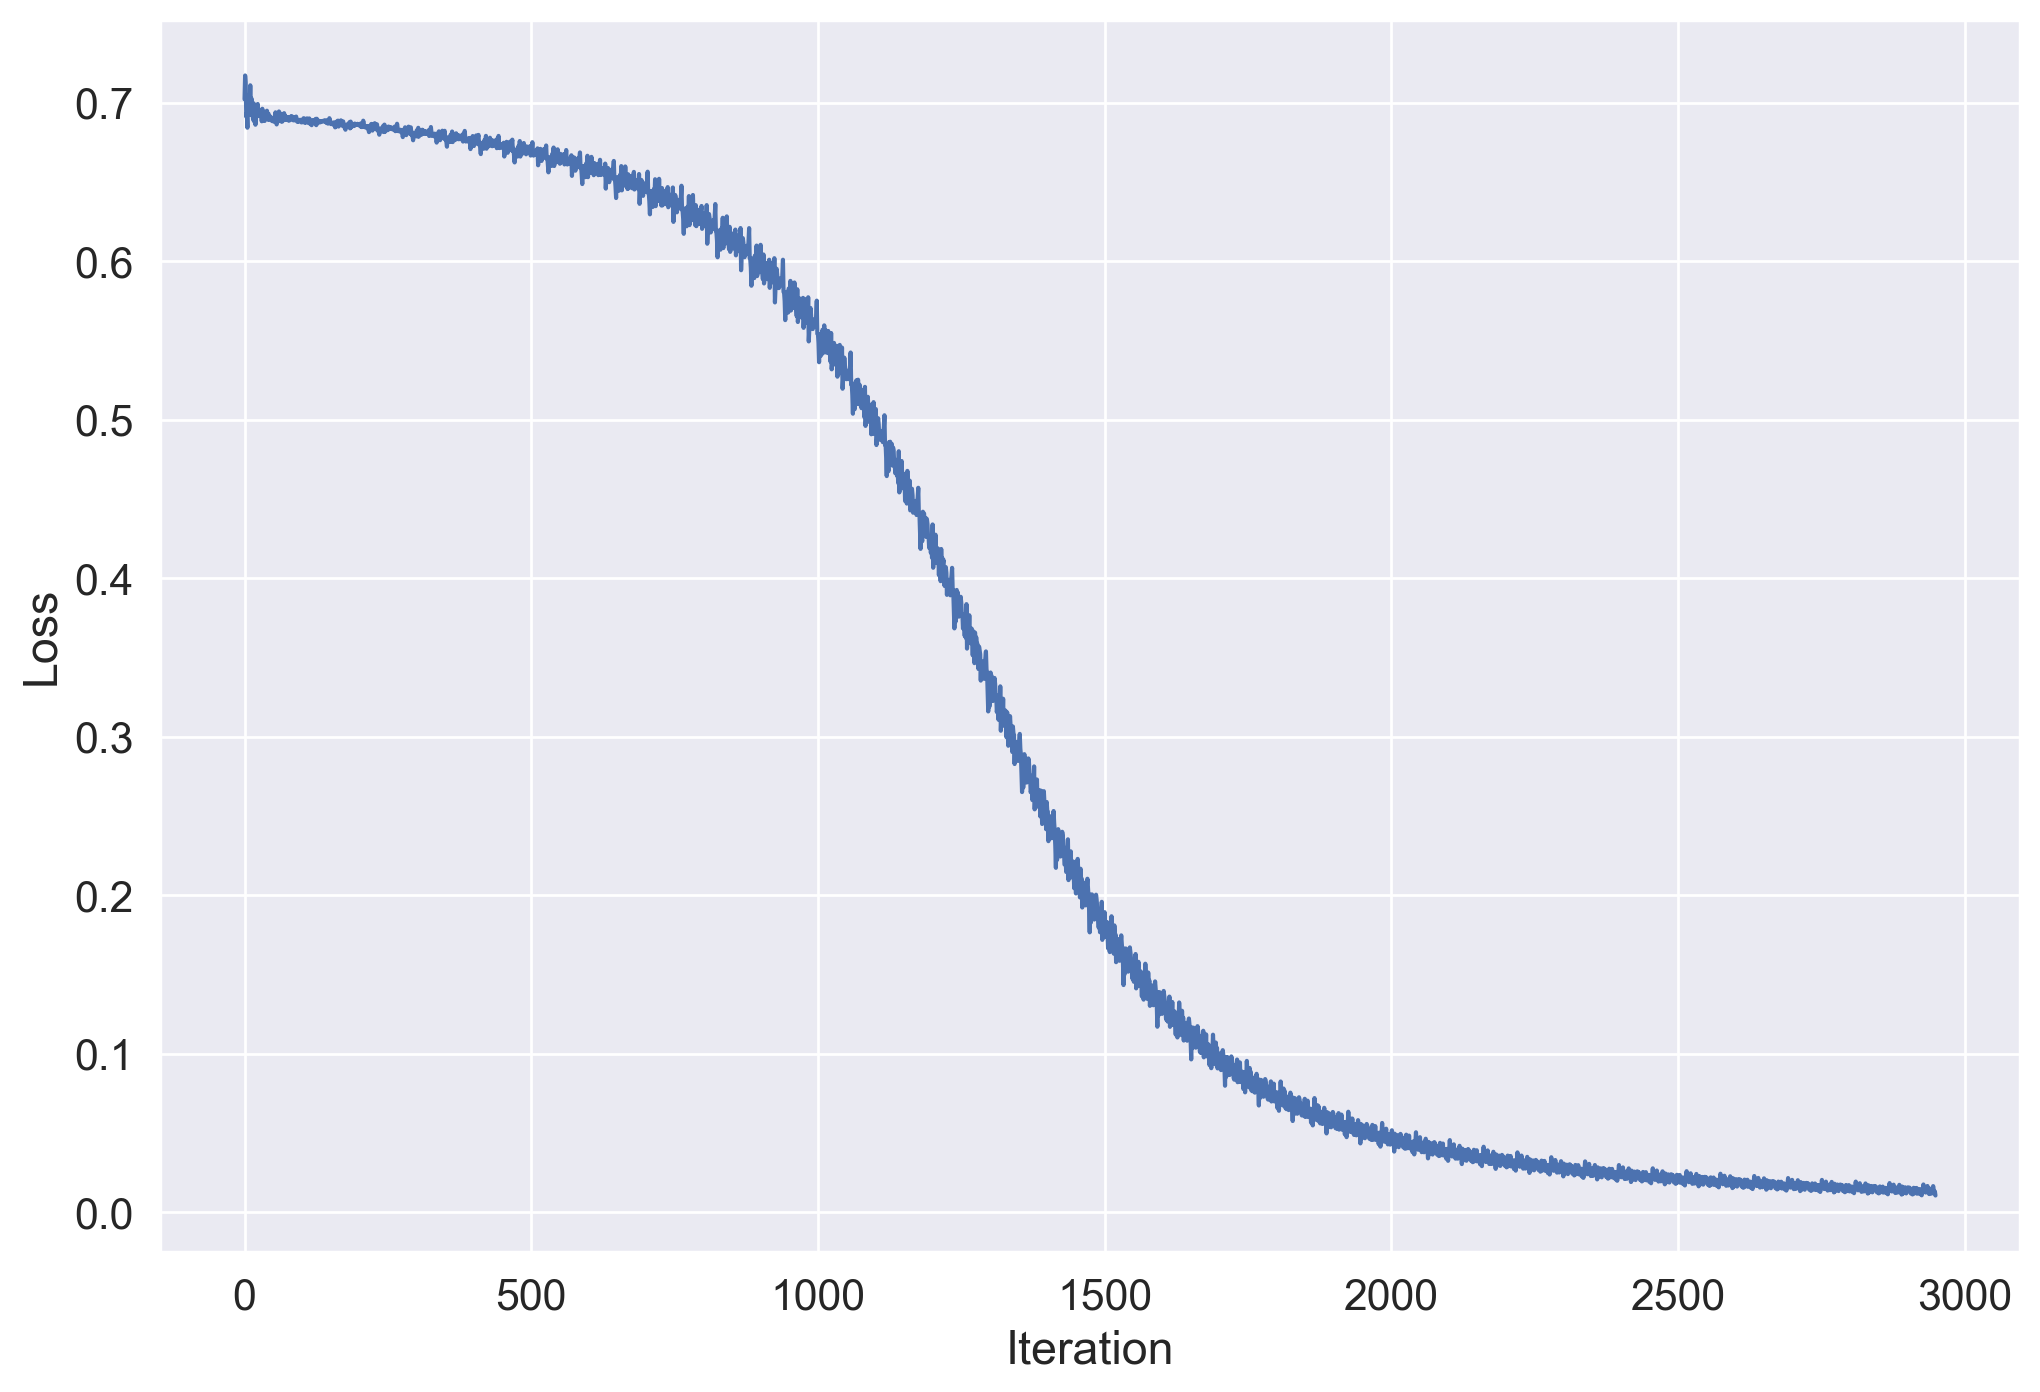

Accuracy: 1.0


In [7]:
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)
model = nn.Sequential(
    nn.Linear(2, 30),
    nn.ReLU(),
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
model, losses = train(model, 50)
show_loss(losses)
accuracy = accuracy_score(y_val, predict(val_dataloader, model))
print("Accuracy:",accuracy)

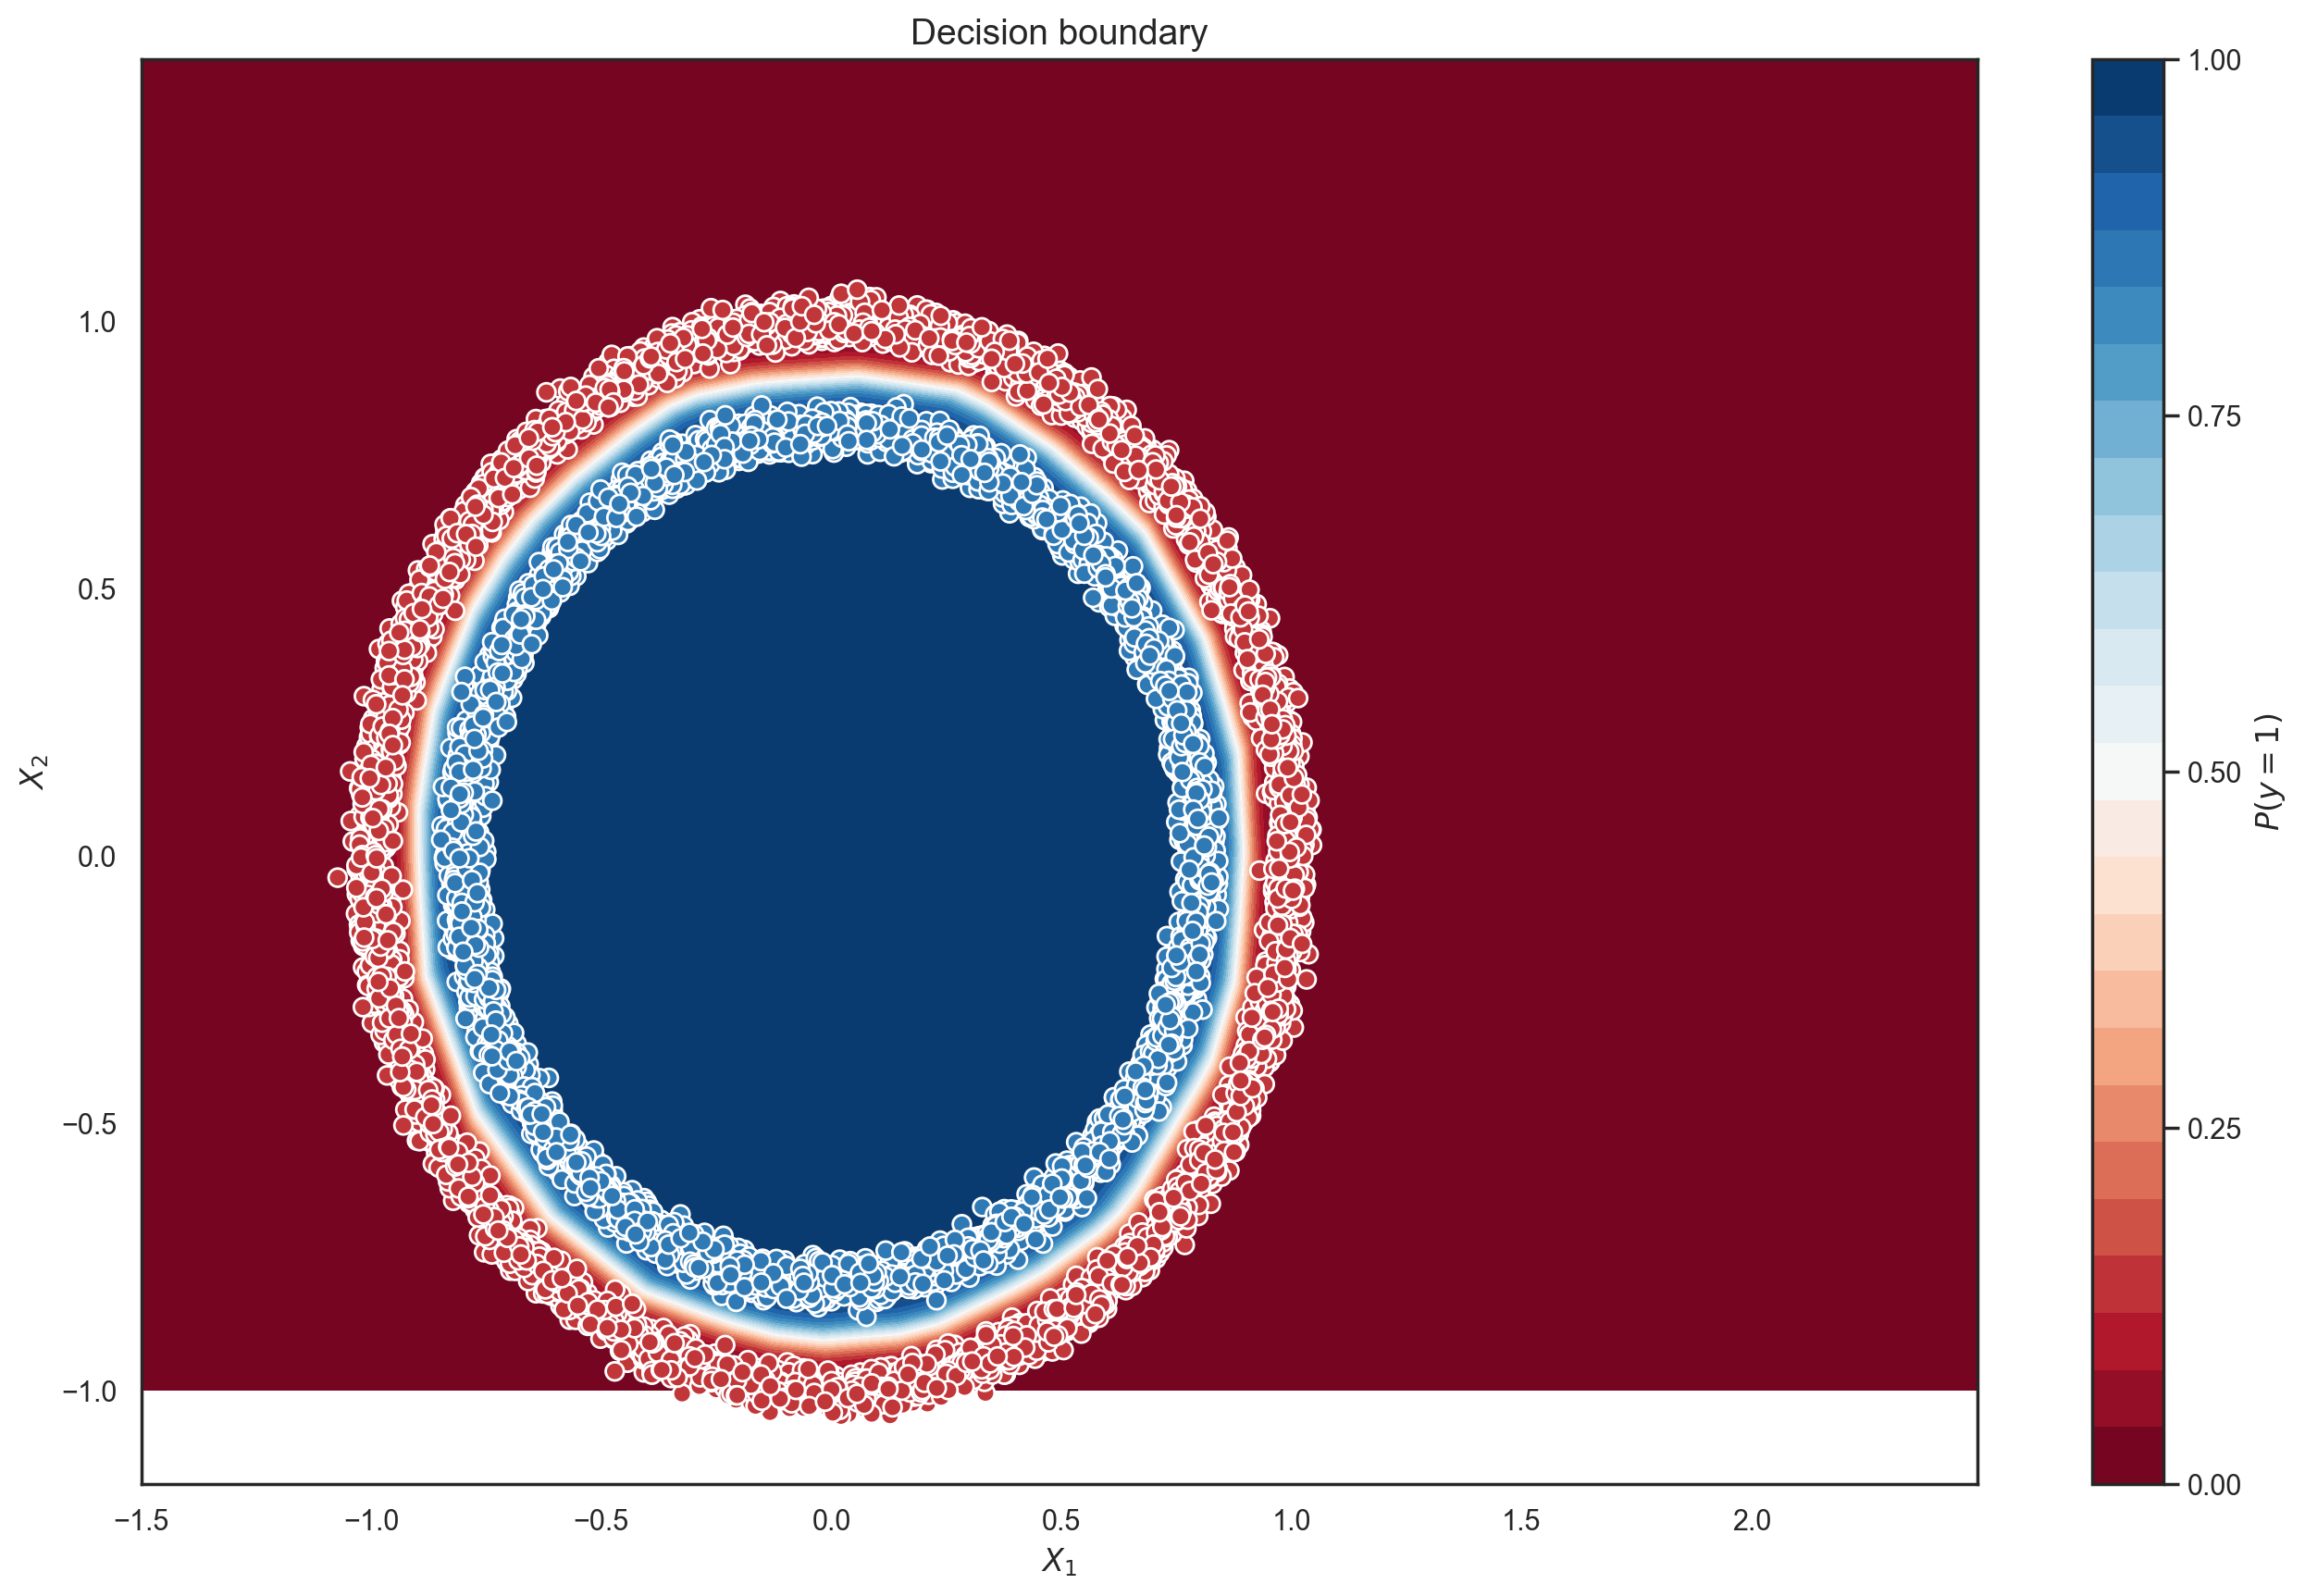

In [8]:
show_separation(model)

## Breast Cancer Dataset

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
data = load_breast_cancer()
x, y = data.data, data.target
x = preprocessing.normalize(x)
print(x.shape)


x, X_test, y, y_test = train_test_split(x, y, test_size=100, random_state=2)
x, X_val, y, y_val = train_test_split(x, y, test_size=50, random_state=1)
X_train_t = torch.from_numpy(x).to(torch.float32)
y_train_t = torch.from_numpy(y).to(torch.float32)
X_val_t = torch.from_numpy(X_val).to(torch.float32)
y_val_t = torch.from_numpy(y_val).to(torch.float32)

(569, 30)


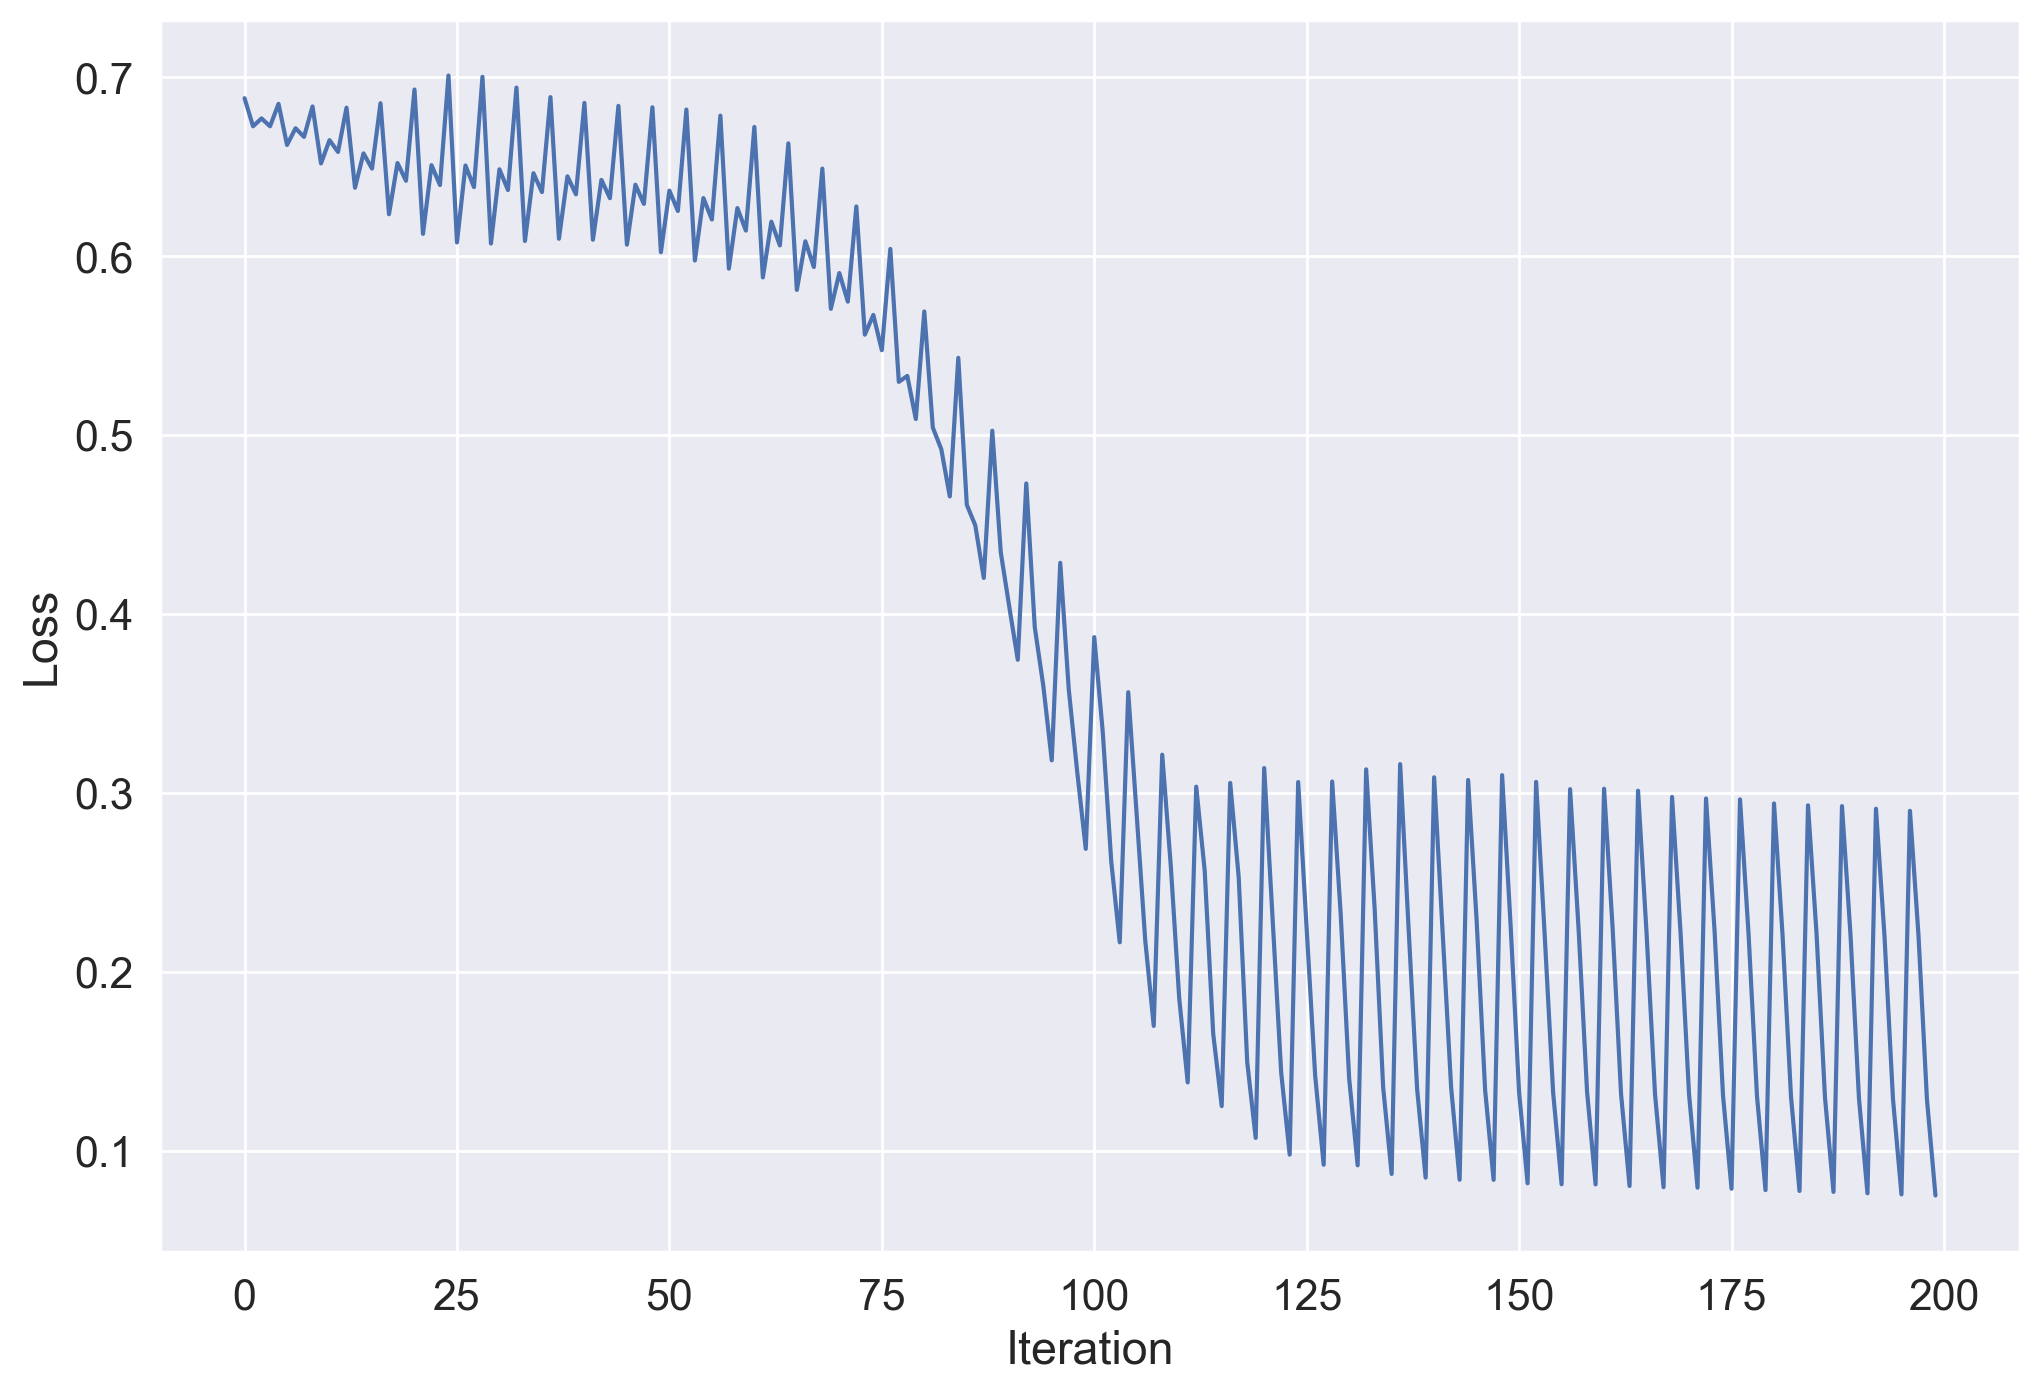

Accuracy: 94.0 %


In [15]:
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)
model = nn.Sequential(
    nn.Linear(30, 300),
    nn.ReLU(),
    nn.Linear(300, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
model, losses = train(model, 50)
show_loss(losses)
accuracy = accuracy_score(y_val, predict(val_dataloader, model))
print("Accuracy:",accuracy*100,"%")
